
# 🧪 项目简介：遥感图像多类分割（基于 PP-LiteSeg）

本项目基于 **PaddleSeg 提供的 PP-LiteSeg 模型**，用于遥感图像的语义分割任务。数据中包含多种地物标签，模型可输出多类别的像素级分割结果。PPLiteseg: Road Segment, Segmenter: multiple Segment

#### 📌 多分类标签说明：

| 类别编号 | 类别名称（英文） | 类别名称（中文） | 说明 |
|----------|------------------|------------------|------|
| 0        | background       | 背景              | 通常为未分类区域 |
| 1        | building         | 建筑              | 房屋、厂房等 |
| 2        | road             | 道路              | 包括主干道、辅路等 |
| 3        | water            | 水体              | 包括河流、湖泊等 |
| 4        | barren           | 裸土              | 裸露土地、沙地等 |
| 5        | forest           | 林地              | 森林、树木等 |
| 6        | agriculture      | 耕地              | 农田、种植区域 |


In [1]:
import pandas as pd
import numpy as np

# 定义表格数据
df_label = {
    "类别编号": [0, 1, 2, 3, 4, 5, 6],
    "类别名称（英文）": ["background", "building", "road", "water", "barren", "forest", "agriculture"],
    "类别名称（中文）": ["背景", "建筑", "道路", "水体", "裸土", "林地", "耕地"],
    "说明": [
        "通常为未分类区域",
        "房屋、厂房等",
        "包括主干道、辅路等",
        "包括河流、湖泊等",
        "裸露土地、沙地等",
        "森林、树木等",
        "农田、种植区域"
    ]
}
# 构造类别编号到 RGB 的映射（索引即为类别编号）
id2color = np.array(
    [
        [0, 0, 0],  # 0 - 背景
        [220, 20, 60],  # 1 - 建筑
        [128, 64, 128],  # 2 - 道路
        [0, 0, 255],  # 3 - 水体
        [210, 180, 140],  # 4 - 裸土
        [34, 139, 34],  # 5 - 林地
        [255, 255, 0],  # 6 - 耕地
    ],
    dtype=np.uint8,
)
df_label = pd.DataFrame(df_label)
df_label

,类别编号,类别名称（英文）,类别名称（中文）,说明
0,0,background,背景,通常为未分类区域
1,1,building,建筑,房屋、厂房等
2,2,road,道路,包括主干道、辅路等
3,3,water,水体,包括河流、湖泊等
4,4,barren,裸土,裸露土地、沙地等
5,5,forest,林地,森林、树木等
6,6,agriculture,耕地,农田、种植区域


[🚗] 正在用 PP-LiteSeg 道路模型推理图像：../photo/1173.png
[✅] 成功读取道路分割结果：../output/test\pseudo_color_prediction\1173.png
[🚀] 正在用 PP-LiteSeg 推理图像（多分类）：../photo/1173.png
[✅] 成功读取输出文件：../output/test\pseudo_color_prediction\1173.png


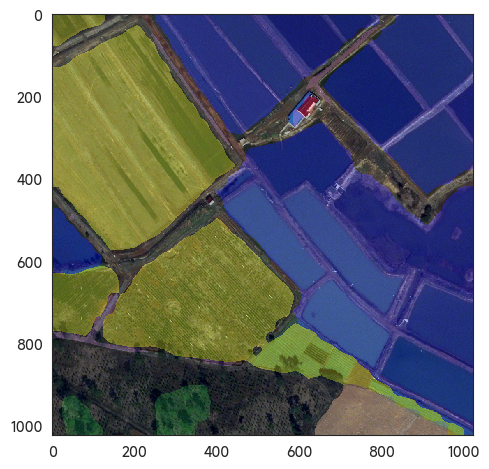

In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import seaborn as sns
from pylab import mpl
from skimage import io

# 配置 Notebook 的字体和风格
warnings.filterwarnings("ignore")
sns.set_style("white")
mpl.rcParams["font.family"] = "MiSans"

# 🚀 示例调用（推荐放在 notebook 的代码单元中）

from infer_all import road_seg, all_seg, overlay_mask_on_image

test_image = "../photo/1173.png"

# ✅ 道路分割模型（只分出 road 类）
road_mask = road_seg(
    image_path=test_image,
    config_path="configs/road_seg/pp_liteseg_stdc1_deepglobe_infer.yml",
    model_path="pp_liteseg_stdc1_deepglobe.pdparams",
    save_dir="../output/test",
)

# ✅ 多类地物分割模型（输出0~6的语义mask）
mask = all_seg(
    image_path=test_image,
    config_path="configs/segmenter/segmenter_rural2.yml",
    model_path="../output/segmenter_rural2/iter_87500/model.pdparams",
    save_dir="../output/test",
)

# ✅ 可选备份一份副本（用于后续处理）
mask_2 = mask.copy()
mask[road_mask == 1] = 2  # 2: road
# 读取图像（确保是 RGB）
img = np.array(Image.open(test_image).convert("RGB"))

# 类别映射（前面定义的 id2color）
colored_overlay = overlay_mask_on_image(img, mask, id2color, alpha=0.3)
io.imshow(colored_overlay)

In [3]:
mask_type_list = np.unique(mask)
print(mask_type_list)
print("本图片含有的分割类型")
df_label.loc[list(mask_type_list)]

[0 1 2 3 4 5 6]
本图片含有的分割类型


,类别编号,类别名称（英文）,类别名称（中文）,说明
0,0,background,背景,通常为未分类区域
1,1,building,建筑,房屋、厂房等
2,2,road,道路,包括主干道、辅路等
3,3,water,水体,包括河流、湖泊等
4,4,barren,裸土,裸露土地、沙地等
5,5,forest,林地,森林、树木等
6,6,agriculture,耕地,农田、种植区域


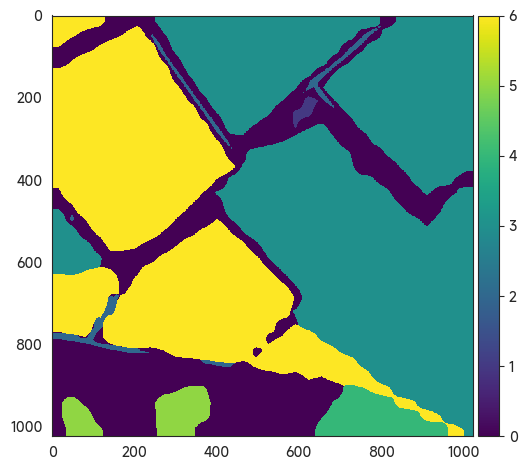

In [4]:
io.imshow(mask)

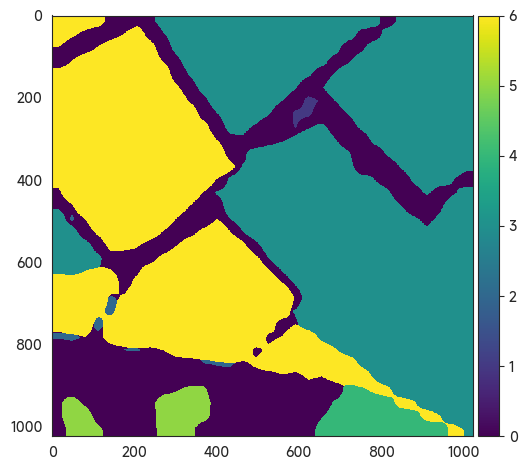

In [5]:
io.imshow(mask_2)